# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Parameters

In [2]:
x_min, x_max = 0., 1.
y_min, y_max = 0., 1.
nx, ny = 50, 50

x_coords, dx = np.linspace(x_min, x_max, nx+1, retstep=True)
y_coords, dy = np.linspace(y_min, y_max, ny+1, retstep=True)

#print(f'dx = {dx}, dy = {dy}')

κ = 1.0 # diffusion coefficient
ϕ = np.zeros([ny+1,nx+1]) # initialize ϕ with zeros

# Boundary Conditions

**Apply the right and top boundary values**

In [3]:
# Right boundary
for j in range(ny+1):
    ϕ[j,-1] = y_coords[j]
    
# Top boundary
for i in range(nx+1):
    ϕ[-1,i] = x_coords[i]

# Jacobi Method

In [4]:
ϕ_old = ϕ.copy()
ϕ_new = ϕ.copy()

In [5]:
for k in range(10000):
    for j in range(1,ny):
        for i in range(1,nx):
            ϕ_new[j,i] = 0.25*(ϕ_old[j,i+1]+ϕ_old[j,i-1]+ϕ_old[j+1,i]+ϕ_old[j-1,i])
    ϕ_old = ϕ_new

# Visualization

C:\Users\nisha\AppData\Local\Temp\ipykernel_13964\3597010402.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


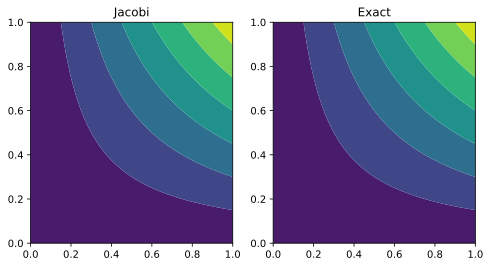

In [6]:
ϕ_exact = np.zeros_like(ϕ)
X, Y = np.meshgrid(x_coords, y_coords)
ϕ_exact = X * Y

fig, ax = plt.subplots(figsize=(8,4))
plt.subplot(1,2,1)
plt.contourf(X,Y,ϕ_new)
plt.title('Jacobi')

plt.subplot(1,2,2)
plt.contourf(X,Y,ϕ_exact)
plt.title('Exact')
plt.show()

# Gauss Seidel

In [8]:
ϕ_gauss = ϕ.copy()

for k in range(10000):
    for j in range(1,ny):
        for i in range(1,nx):
            ϕ_gauss[j,i] = 0.25*(ϕ_gauss[j,i+1]+ϕ_gauss[j,i-1]+ϕ_gauss[j+1,i]+ϕ_gauss[j-1,i])

C:\Users\nisha\AppData\Local\Temp\ipykernel_13964\1245251614.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


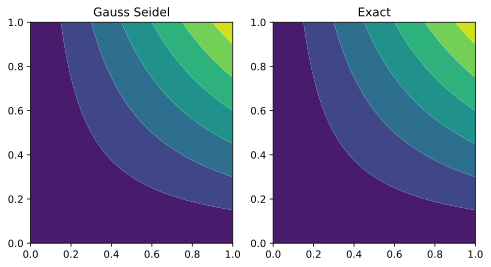

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
plt.subplot(1,2,1)
plt.contourf(X,Y,ϕ_gauss)
plt.title('Gauss Seidel')

plt.subplot(1,2,2)
plt.contourf(X,Y,ϕ_exact)
plt.title('Exact')
plt.show()

# SOR 

In [11]:
ϕ_SOR = ϕ.copy()
Ω = 1.1

for k in range(10000):
    for j in range(1,ny):
        for i in range(1,nx):
            ϕ_SOR[j,i] = (1-Ω)*ϕ_SOR[j,i] + Ω*0.25*(ϕ_SOR[j,i+1]+ϕ_SOR[j,i-1]+ϕ_SOR[j+1,i]+ϕ_SOR[j-1,i])

C:\Users\nisha\AppData\Local\Temp\ipykernel_13964\1190112923.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


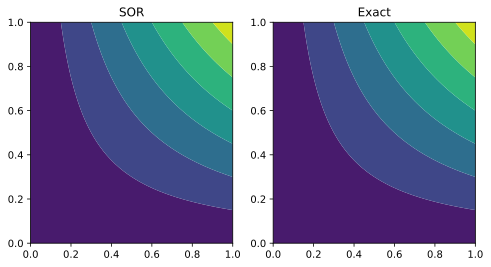

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
plt.subplot(1,2,1)
plt.contourf(X,Y,ϕ_SOR)
plt.title('SOR')

plt.subplot(1,2,2)
plt.contourf(X,Y,ϕ_exact)
plt.title('Exact')
plt.show()

# Error Comparison

In [17]:
ϵ_jacobi = 0.0
ϵ_gauss = 0.0
ϵ_sor = 0.0

for j in range(1,ny+1):
    for i in range(1,nx+1):
        ϵ_jacobi += (ϕ_new[j,i]-ϕ_exact[j,i])**2.
        ϵ_gauss += (ϕ_gauss[j,i]-ϕ_exact[j,i])**2.
        ϵ_sor += (ϕ_SOR[j,i]-ϕ_exact[j,i])**2.
        
print(f'Jacobi : {np.sqrt(ϵ_jacobi)}')
print(f'Gauss : {np.sqrt(ϵ_gauss)}')
print(f'SOR : {np.sqrt(ϵ_sor)}')

Jacobi : 2.1582718060386172e-13
Gauss : 2.1582718060386172e-13
SOR : 1.795832443937471e-13
